In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install statsmodels==0.12.0

     |████████████████████████████████| 9.5 MB 7.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [3]:
%cp /content/drive/MyDrive/CSVs/* ./

In [4]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.graphics.gofplots import qqplot

In [5]:
from pandas_datareader import data as pdr
from datetime import datetime

In [6]:
df = pd.read_csv('/content/Apple_stock.csv')

In [7]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2018-12-31,39.840000,39.119999,39.632500,39.435001,140014000.0,38.338478
1,2019-01-02,39.712502,38.557499,38.722500,39.480000,148158800.0,38.382229
2,2019-01-03,36.430000,35.500000,35.994999,35.547501,365248800.0,34.559078
3,2019-01-04,37.137501,35.950001,36.132500,37.064999,234428400.0,36.034370
4,2019-01-07,37.207500,36.474998,37.174999,36.982498,219111200.0,35.954170


In [8]:
df.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
248,2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,70.129517
249,2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.520905
250,2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.493759
251,2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,71.918083
252,2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,72.443558


#**Stock Return Analysis**

In [9]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [10]:
close = df['Close']
date_rng  =  pd.date_range(end='2019-12-31', periods=253, freq='B')

In [11]:
df=pd.DataFrame(close.values,columns=['Close'])
df['TimeIndex'] = pd.DataFrame(date_rng, columns=['B-Days'])

In [12]:
df

,Close,TimeIndex
0,39.435001,2019-01-11
1,39.480000,2019-01-14
2,35.547501,2019-01-15
3,37.064999,2019-01-16
4,36.982498,2019-01-17
...,...,...
248,71.067497,2019-12-25
249,72.477501,2019-12-26
250,72.449997,2019-12-27
251,72.879997,2019-12-30


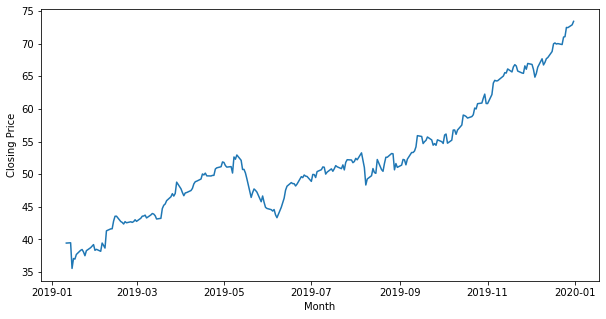

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(df.TimeIndex, df.Close)
plt.ylabel('Closing Price')
plt.xlabel('Month')
plt.show()

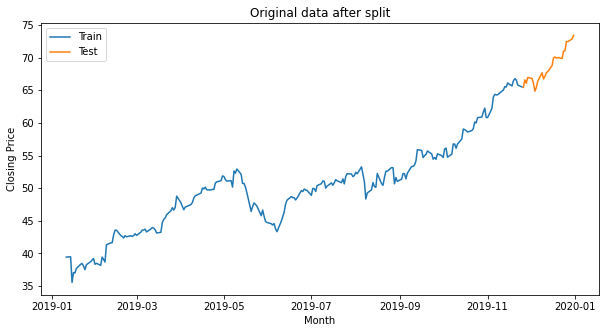

In [14]:
train = df[0:int(len(df)*0.9)] 
test= df[int(len(df)*0.9):]

plt.figure(figsize=(10, 5))
plt.plot(train.TimeIndex, train.Close, label = 'Train')
plt.plot(test.TimeIndex, test.Close,  label = 'Test')

plt.legend(loc = 'best')
plt.ylabel('Closing Price')
plt.xlabel('Month')
plt.title('Original data after split')
plt.show()

In [15]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [16]:
from sklearn.metrics import  mean_squared_error

In [17]:
# create class
model = SimpleExpSmoothing(np.asarray(train['Close']))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


For alpha = 0.00,  RMSE is 29.2734 


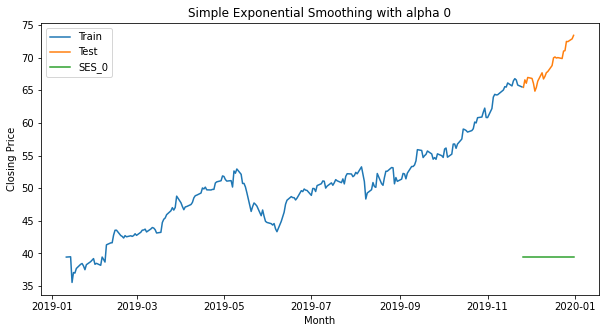

In [18]:
alpha_value = 0

pred_SES = test.copy() 

alpha_str =  "SES_" + str(alpha_value)
mode_fit_i  =  model.fit(smoothing_level = alpha_value, optimized=False)
pred_SES[alpha_str]  =  mode_fit_i.forecast(len(test['Close']))
rmse =  np.sqrt(mean_squared_error(test['Close'], pred_SES[alpha_str]))


print("For alpha = %1.2f,  RMSE is %3.4f " %(alpha_value, rmse))
plt.figure(figsize=(10,5))
plt.plot(train.TimeIndex, train['Close'], label ='Train')
plt.plot(test.TimeIndex, test['Close'], label  ='Test')
plt.plot(test.TimeIndex, pred_SES[alpha_str], label  = alpha_str)
plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value))
plt.ylabel('Closing Price')
plt.xlabel('Month')
plt.legend(loc='best') 
plt.show()

For alpha = 0.10,  RMSE is 4.8663 


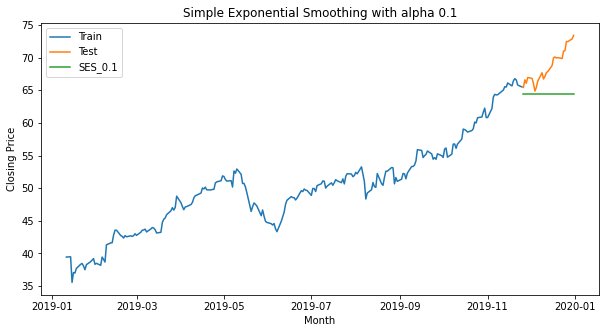

In [19]:
alpha_value = 0.1

pred_SES = test.copy() 

alpha_str =  "SES_" + str(alpha_value)
mode_fit_i  =  model.fit(smoothing_level = alpha_value, optimized=False)
pred_SES[alpha_str]  =  mode_fit_i.forecast(len(test['Close']))
rmse =  np.sqrt(mean_squared_error(test['Close'], pred_SES[alpha_str]))


print("For alpha = %1.2f,  RMSE is %3.4f " %(alpha_value, rmse))
plt.figure(figsize=(10,5))
plt.plot(train.TimeIndex, train['Close'], label ='Train')
plt.plot(test.TimeIndex, test['Close'], label  ='Test')
plt.plot(test.TimeIndex, pred_SES[alpha_str], label  = alpha_str)
plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value))
plt.ylabel('Closing Price')
plt.xlabel('Month')
plt.legend(loc='best') 
plt.show()

For alpha = 0.50,  RMSE is 3.7352 


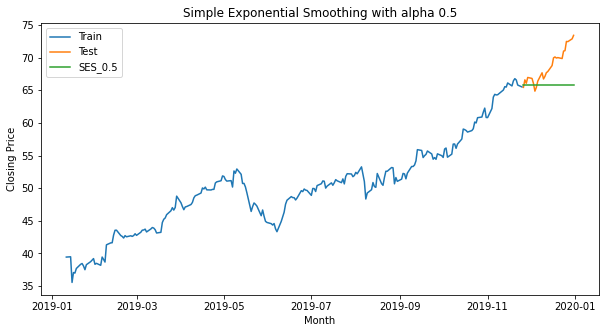

In [20]:
alpha_value = 0.5

pred_SES = test.copy() 

alpha_str =  "SES_" + str(alpha_value)
mode_fit_i  =  model.fit(smoothing_level = alpha_value, optimized=False)
pred_SES[alpha_str]  =  mode_fit_i.forecast(len(test['Close']))
rmse =  np.sqrt(mean_squared_error(test['Close'], pred_SES[alpha_str]))


print("For alpha = %1.2f,  RMSE is %3.4f " %(alpha_value, rmse))
plt.figure(figsize=(10,5))
plt.plot(train.TimeIndex, train['Close'], label ='Train')
plt.plot(test.TimeIndex, test['Close'], label  ='Test')
plt.plot(test.TimeIndex, pred_SES[alpha_str], label  = alpha_str)
plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value))
plt.ylabel('Closing Price')
plt.xlabel('Month')
plt.legend(loc='best') 
plt.show()

For alpha = 0.90,  RMSE is 3.9515 


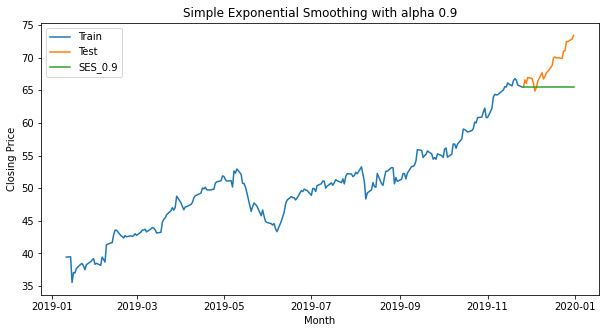

In [21]:
alpha_value = 0.9

pred_SES = test.copy() 

alpha_str =  "SES_" + str(alpha_value)
mode_fit_i  =  model.fit(smoothing_level = alpha_value, optimized=False)
pred_SES[alpha_str]  =  mode_fit_i.forecast(len(test['Close']))
rmse =  np.sqrt(mean_squared_error(test['Close'], pred_SES[alpha_str]))


print("For alpha = %1.2f,  RMSE is %3.4f " %(alpha_value, rmse))
plt.figure(figsize=(10,5))
plt.plot(train.TimeIndex, train['Close'], label ='Train')
plt.plot(test.TimeIndex, test['Close'], label  ='Test')
plt.plot(test.TimeIndex, pred_SES[alpha_str], label  = alpha_str)
plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value))
plt.ylabel('Closing Price')
plt.xlabel('Month')
plt.legend(loc='best') 
plt.show()

For alpha = 0.99,  RMSE is 3.9782 


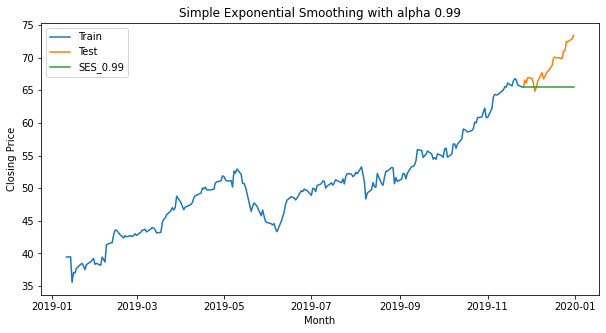

In [22]:
alpha_value = 0.99

pred_SES = test.copy() 

alpha_str =  "SES_" + str(alpha_value)
mode_fit_i  =  model.fit(smoothing_level = alpha_value, optimized=False)
pred_SES[alpha_str]  =  mode_fit_i.forecast(len(test['Close']))
rmse =  np.sqrt(mean_squared_error(test['Close'], pred_SES[alpha_str]))


print("For alpha = %1.2f,  RMSE is %3.4f " %(alpha_value, rmse))
plt.figure(figsize=(10,5))
plt.plot(train.TimeIndex, train['Close'], label ='Train')
plt.plot(test.TimeIndex, test['Close'], label  ='Test')
plt.plot(test.TimeIndex, pred_SES[alpha_str], label  = alpha_str)
plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value))
plt.ylabel('Closing Price')
plt.xlabel('Month')
plt.legend(loc='best') 
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,



Simple Exponential Smoothing 


Smoothing Level 0.9558
Initial Level 39.4294

For alpha = 0.96,  RMSE is 3.9692 


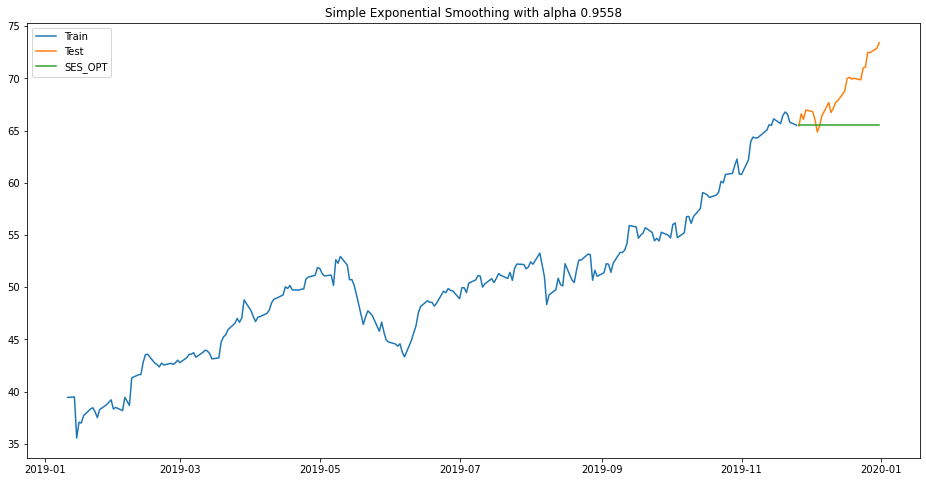

            227        228        229        230       231
Y_hat  65.51707  65.517070  65.517070  65.517070  65.51707
Y      65.44500  66.592499  66.072502  66.959999  66.81250


In [23]:
pred_opt   =  SimpleExpSmoothing(train['Close']).fit(optimized = True)
print('')
print('Simple Exponential Smoothing ')
print('')

print('')
print('Smoothing Level', np.round(pred_opt.params['smoothing_level'], 4))
print('Initial Level',   np.round(pred_opt.params['initial_level'], 4))
print('')

y_pred_opt           = pred_opt.forecast(steps = 26)
df_pred_opt          = pd.DataFrame({'Y_hat':y_pred_opt,'Y':test['Close'].values})

rmse_opt             =  np.sqrt(mean_squared_error(test['Close'], y_pred_opt))

alpha_value          = np.round(pred_opt.params['smoothing_level'], 4)

print("For alpha = %1.2f,  RMSE is %3.4f " %(alpha_value, rmse_opt))

plt.figure(figsize=(16,8))
plt.plot(train.TimeIndex, train['Close'], label = 'Train')
plt.plot(test.TimeIndex, test['Close'],  label = 'Test')
plt.plot(test.TimeIndex, y_pred_opt,           label = 'SES_OPT')
plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value))
plt.legend(loc='best') 
plt.show()

print(df_pred_opt.head().T)

# **Holt’s Method**

In [29]:
from   statsmodels.tsa.holtwinters import  Holt
model_holt = Holt(np.asarray(train['Close']))

model_fit = model_holt.fit()

print('')
print('==Holt model Exponential Smoothing Parameters ==')
print('')
alpha_value = np.round(model_fit.params['smoothing_level'], 4)
print('Smoothing Level', alpha_value)
print('Initial Level',   np.round(model_fit.params['initial_level'], 4))
print('')


==Holt model Exponential Smoothing Parameters ==

Smoothing Level 0.9261
Initial Level 39.2926



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


In [30]:
Pred_Holt = test.copy()

Pred_Holt['Opt'] = model_fit.forecast(len(test['Close']))

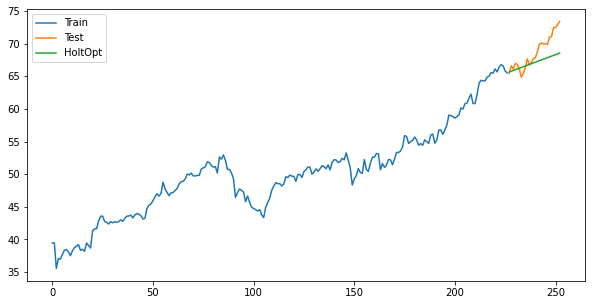

In [31]:
plt.figure(figsize=(10,5))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(Pred_Holt['Opt'], label='HoltOpt')
plt.legend(loc='best')
plt.show()

In [32]:
df_pred_opt =  pd.DataFrame({'Y_hat':Pred_Holt['Opt'] ,'Y':test['Close'].values})
rmse_opt =  np.sqrt(mean_squared_error(df_pred_opt.Y, df_pred_opt.Y_hat))

print("For alpha = %1.2f,  RMSE is %3.4f " %(alpha_value, rmse_opt))

For alpha = 0.93,  RMSE is 2.2765 


# **Holt-Winters’ Method**

In [35]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

pred1 = ExponentialSmoothing(np.asarray(train['Close']), trend='additive', damped_trend=False, seasonal='additive',
                                  seasonal_periods = 74).fit()
alpha_value = np.round(pred1.params['smoothing_level'], 4)
### Forecast for next 16 months

y_pred1 =  pred1.forecast(steps = 26)
df_pred1 = pd.DataFrame({'Y_hat':y_pred1,'Y':test['Close']})

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


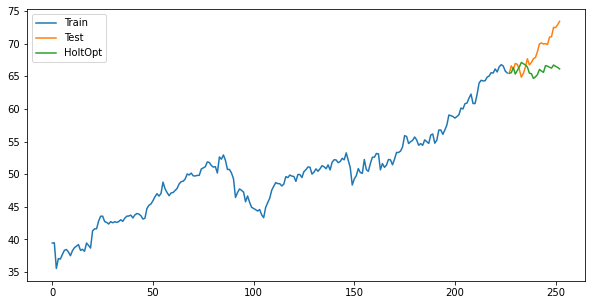

In [36]:
plt.figure(figsize=(10,5))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(df_pred1.Y_hat, label='HoltOpt')
plt.legend(loc='best')
plt.show()

In [37]:
rmse =  np.sqrt(mean_squared_error(df_pred1.Y, df_pred1.Y_hat))

print("For alpha = %1.2f,  RMSE is %3.4f " %(alpha_value, rmse))

For alpha = 0.90,  RMSE is 3.5756 
